# Linear Regression

## Univariate Linear

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [57]:
# Definisikan dataset 
df = pd.DataFrame([[8,7],[2,3],[6,7],[4,2],[7,8],[3,3]])
df.columns = ['x', 'y']
print(df)

   x  y
0  8  7
1  2  3
2  6  7
3  4  2
4  7  8
5  3  3


In [58]:
X_train = df['x'].values[:, np.newaxis]
y_train = df['y'].values

In [59]:
# Create & train model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# Menampilkan nilai coef & intercept
print('Coeficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coeficient:  [0.96428571]
Intercept:  0.1785714285714297


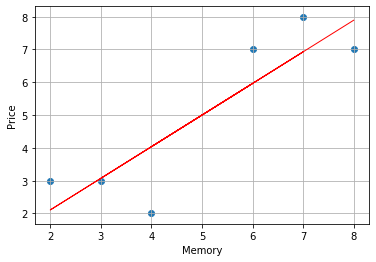

In [61]:
pb = lm.predict(X_train)
dfc = pd.DataFrame({'x': df['x'],'y':pb})

plt.scatter(df['x'],df['y'])
plt.plot(dfc['x'],dfc['y'],color='red',linewidth=1)
plt.xlabel('Memory')
plt.ylabel('Price')
plt.grid()
plt.show()

## Exercise

In [62]:
df = pd.DataFrame([[28,127],[45,160],[43,158],[65,167],[46,163],[37,142]])
df.columns = ['x', 'y']
print(df)

    x    y
0  28  127
1  45  160
2  43  158
3  65  167
4  46  163
5  37  142


In [63]:
X_train = df['x'].values[:, np.newaxis]
y_train = df['y'].values

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
print('Coeficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coeficient:  [1.07579787]
Intercept:  105.49822695035463


In [66]:
X_test = [[15], [32]]

In [67]:
p = lm.predict(X_test)
print(p)

[121.63519504 139.92375887]


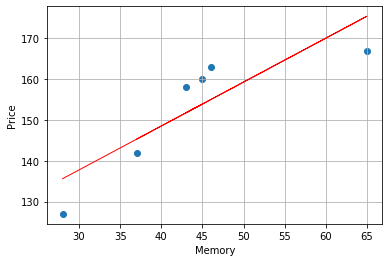

In [68]:
pb = lm.predict(X_train)
dfc = pd.DataFrame({'x': df['x'],'y':pb})

plt.scatter(df['x'],df['y'])
plt.plot(dfc['x'],dfc['y'],color='red',linewidth=1)
plt.xlabel('Memory')
plt.ylabel('Price')
plt.grid()
plt.show()

## Multivariate Linear

In [69]:
df_padi = pd.read_csv('datapadi.csv', sep=';', names=['bulan','luas','curah_hujan','hama','hasil'], index_col='bulan')
df_padi

,luas,curah_hujan,hama,hasil
bulan,,,,
Bulan Tanam,Luas Panen (X1),Curah Hujan (X2),Hama (X3),Hasil Panen
Jan – Apr 2009,14210,Baik (10),10.70%,91862
Mei – Ags 2009,10863,Kurang (-20),12%,68244
Sep – Des 2009,3185,Kurang (-20),11.90%,22737
Jan – Apr 2010,12254,Baik (10),5.90%,81121
Mei – Ags 2010,11851,Kurang (-20),75%,63034
Sep – Des 2010,6621,Baik (10),14.50%,46201
Jan – Apr 2011,13388,Baik (10),7.50%,87552
Mei – Ags 2011,12708,Kurang (-20),23.70%,77131


In [70]:
# Hapus data header
df_padi.drop(['Bulan Tanam'], inplace=True)

In [71]:
df_padi.head()

,luas,curah_hujan,hama,hasil
bulan,,,,
Jan – Apr 2009,14210,Baik (10),10.70%,91862
Mei – Ags 2009,10863,Kurang (-20),12%,68244
Sep – Des 2009,3185,Kurang (-20),11.90%,22737
Jan – Apr 2010,12254,Baik (10),5.90%,81121
Mei – Ags 2010,11851,Kurang (-20),75%,63034


In [72]:
# Bersihkan data curah hujan
df_padi['curah_hujan'] = df_padi.curah_hujan.str.extract('(-?\d+)') 

In [73]:
# Bersihkan data hama
df_padi['hama'] = df_padi.apply(lambda x:x['hama'][:-1], axis=1)

In [74]:
# Convert to number(int, float)
df_padi["luas"] = df_padi.luas.astype(int)
df_padi["curah_hujan"] = df_padi.curah_hujan.astype(int)
df_padi["hama"] = df_padi.hama.astype(float)
df_padi["hasil"] = df_padi.hasil.astype(int)

In [75]:
df_padi.head()

,luas,curah_hujan,hama,hasil
bulan,,,,
Jan – Apr 2009,14210,10,10.7,91862
Mei – Ags 2009,10863,-20,12.0,68244
Sep – Des 2009,3185,-20,11.9,22737
Jan – Apr 2010,12254,10,5.9,81121
Mei – Ags 2010,11851,-20,75.0,63034


In [76]:
len(df_padi)

27

In [77]:
# Membagi dataset (Terdapat 27 rows: Train 21 rows, test 6 rows)
train = df_padi[:21]
test = df_padi[21:]

In [78]:
print(train.shape)
print(test.shape)

(21, 4)
(6, 4)


In [79]:
X_train = train[['luas','curah_hujan','hama']]
y_train = train['hasil']

In [80]:
# Membuat & melatih Model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [81]:
# Mendapatkan nilai coef & intercept
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 8306.792151921123
Coefficients: 
 [   5.929528    118.27991767 -175.71483753]


<pre>y = 5.929528.x1 + 118.27991767.x2 -175.71483753.x3 + 8306.792151921123
dimana: luas lahan(x1), curah hujan(x2) dan hama(x3)</pre>

In [83]:
X_test = test[['luas','curah_hujan','hama']]
y_test = test['hasil']

In [86]:
pred = regr.predict(X_test)
pred
21.21.1541

array([76958.84119523, 69435.39416824, 36814.91817001, 88102.33809985,
       68125.91833895, 26367.40042722])

In [85]:
print(y_test)

bulan
Jan – Apr 2016    76962
Mei – Ags 2016    69432
Sep – Des 2016    36812
Jan – Apr 2017    88102
Mei – Ags 2017    68126
Sep – Des 2017    26374
Name: hasil, dtype: int64


In [87]:
# Evaluasi Model
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))
print(rmse)

3.504508591002036
